In [2]:
from pathlib import Path
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
# Ruta del archivo CSV
file_path = r"C:\Users\Usuario Autorizado\Documents\Ml II\loan_data_set.csv"

# Intenta cargar el archivo CSV
try:
    df = pd.read_csv(file_path)
    print("Archivo cargado exitosamente.")
    # Puedes mostrar las primeras filas del DataFrame para verificar
    print(df.head())
except FileNotFoundError as e:
    print(f"Error: {e}")
except Exception as ex:
    print(f"Otro error: {ex}")

Archivo cargado exitosamente.
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status        date  
0             1.0         Urban           Y  2021-03-16  
1           

In [4]:
df.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,date
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2021-03-16
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,2021-03-16
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,2021-03-16
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,2021-03-16
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N,2021-03-16


In [5]:
# shape de dataframe
df.shape
df['Credit_History'].shape
df[['Credit_History']].shape

(614, 1)

In [6]:
#propiedades
df.info() # info general
df.describe() # estadistica descriptiva
df.describe(exclude=np.number) # estadistica descriptiva para columnas cuali o categoricas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  date               614 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 67.3+ KB


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,date
count,614,601,611,599,614,582,614,614,614
unique,614,2,2,4,2,2,3,2,1
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y,2021-03-16
freq,1,489,398,345,480,500,233,422,614


In [7]:
### missing info y solving- Para ver la cantidad de valores nulos por columna
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
date                  0
dtype: int64

Se llena los valores nulos con el valor de la fila siguiente (bfill), inplace=True con ello se le dice que modifique el dtaframe original. En contraste con method='bfill', que llena hacia atrás (utilizando el valor de la fila siguiente), method='pad' o method='ffill' llena hacia adelante (utilizando el valor de la fila anterior).

In [8]:
#‘bfill’, ‘pad’, ‘ffill’, None, sin method: 0
df.fillna(method='bfill',inplace=True)

C:\Users\Usuario Autorizado\AppData\Local\Temp\ipykernel_8920\2491648272.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill',inplace=True)


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  date               614 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 67.3+ KB


In [10]:
#formato de columnas
df.isnull().sum()
df['Credit_History'].unique()


array([1., 0.])

convierte los valores en la columna 'Credit_History' en un tipo de datos categórico

In [12]:
df['Credit_History']=df['Credit_History'].astype('category')


 convierte los valores en la columna 'ApplicantIncome' en enteros de 32 bits. Esto puede ser útil si deseas reducir el uso de memoria y los valores en la columna pueden ser representados de manera eficiente como enteros de 32 bits.

In [13]:
df['ApplicantIncome']=df['ApplicantIncome'].astype('int32')

<Axes: >

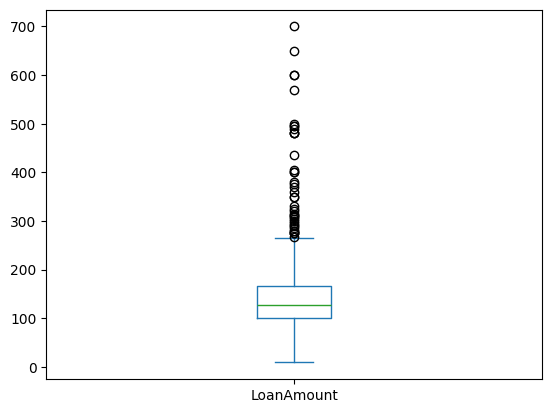

In [14]:
# graficos boxplot
df['LoanAmount'].plot(kind='box')


In [17]:

df['sqrtCoapplicantIncome'] = np.sqrt(df['CoapplicantIncome'])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,date,sqrtCoapplicantIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,2021-03-16,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,2021-03-16,38.832976
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,2021-03-16,0.000000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,2021-03-16,48.559242
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,2021-03-16,0.000000


0.9795605436152078

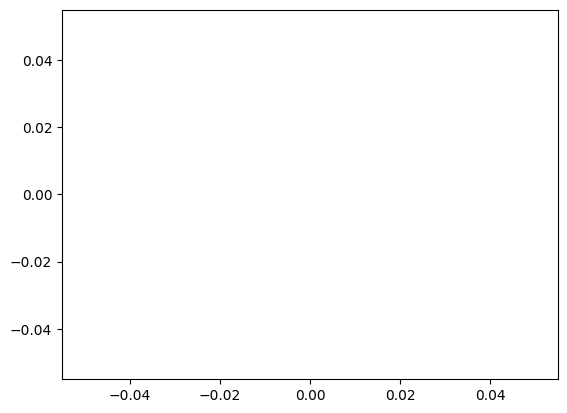

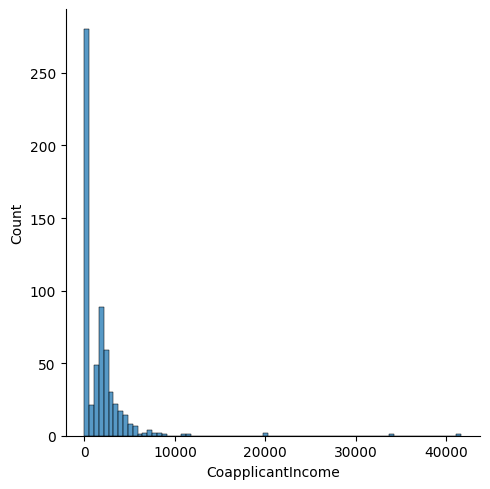

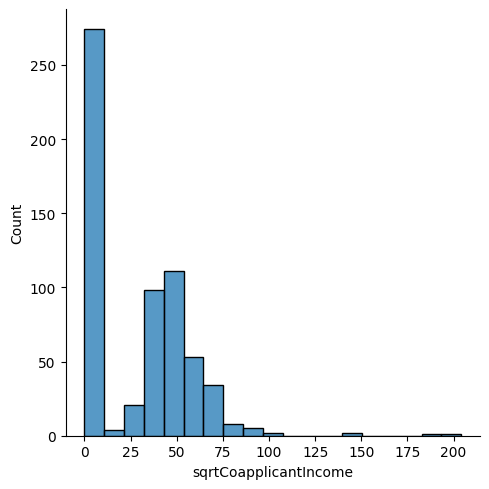

In [18]:
# grafico de distribuciones de la variable
plt.plot(figsize=(15,5))
sns.displot(df['CoapplicantIncome'], label='CoapplicantIncome')
sns.displot(df['sqrtCoapplicantIncome'],label='sqrtCoapplicationIncome')
df.CoapplicantIncome.skew()
df.sqrtCoapplicantIncome.skew()

Normalización

1. forma 1

In [19]:
## Normalizacion via Z-score( (x- mean)/std)
mean_loan=df['LoanAmount'].mean()
std_loan=df['LoanAmount'].std()

df['zscoreloanamount']=(df['LoanAmount']-mean_loan)/std_loan
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,date,sqrtCoapplicantIncome,zscoreloanamount
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,2021-03-16,0.000000,-0.216881
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,2021-03-16,38.832976,-0.216881
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,2021-03-16,0.000000,-0.947002
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,2021-03-16,48.559242,-0.311090
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,2021-03-16,0.000000,-0.063791


2. Segunda forma  con Skelearn

In [20]:
#otra forma con sklearn y eso si lo quiero trabajr directamente sobre sklearn

from sklearn.preprocessing import MinMaxScaler

MS=MinMaxScaler()

minmaxloan=MS.fit_transform(df[['LoanAmount']])


In [21]:
minmaxloan

array([[0.17221418],
       [0.17221418],
       [0.08248915],
       [0.16063676],
       [0.1910275 ],
       [0.37337192],
       [0.12445731],
       [0.21562952],
       [0.2301013 ],
       [0.49204052],
       [0.08827786],
       [0.1447178 ],
       [0.276411  ],
       [0.15195369],
       [0.01157742],
       [0.16787265],
       [0.1316932 ],
       [0.09696093],
       [0.17945007],
       [0.15340087],
       [0.13748191],
       [0.44283647],
       [0.15484805],
       [0.14905933],
       [0.20549928],
       [0.2633864 ],
       [0.16353111],
       [0.14616498],
       [0.03762663],
       [0.16063676],
       [0.27785818],
       [0.09406657],
       [0.14037627],
       [0.15195369],
       [0.45007236],
       [0.1316932 ],
       [0.1316932 ],
       [0.19536903],
       [0.25325615],
       [0.14616498],
       [0.10274964],
       [0.05499276],
       [0.09551375],
       [0.18089725],
       [0.12590449],
       [0.11432706],
       [0.05065123],
       [0.195

Otra tranformacion o preprocesamiento de los datos


## one hot encoder


In [22]:

df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [ ]:
# # urban=0  ; rural=1; semiurban=2
# # urban_ind=0  ; rural_ind=1; semiurban_ind=2 n e sel numero de componentes unicos
# urban              1 0 0    # como urbano e sindice o entonces pongo el 1 en el indice cero.
# urban              1 0 0
# rural              0 1 0
# semiurban          0 0 1
# rural              0 1 0
#otra forma del one coding que es n-1     que e suna componenete menos
# # urban_ind=0  ; rural_ind=1
# urban              1 0
# urban              1 0
# rural              0 1
# semiurban          0 0  #indica que es semi urbano
# rural              0 1

In [23]:
#ahora hagamoslo
Property_Area_1hot = pd.get_dummies(df['Property_Area'], drop_first=True) #drop_first que se remueve la primera columna para reducir dimensionalidad


In [24]:
Property_Area_1hot

,Semiurban,Urban
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
609,False,False
610,False,False
611,False,True
612,False,True


In [25]:
#ahora con sklearn
##scikitlearn

# Importar la clase OneHotEncoder desde sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder
# Crear una instancia de OneHotEncoder con el parámetro drop='first'
onehot=OneHotEncoder(drop='first')

comentario:  Cuando drop='first', se elimina la primera categoría, lo que significa que se crea una columna menos en la representación one-hot.

In [26]:
Onehot_PA= onehot.fit(df[['Property_Area','Gender']]) # Ajustar la codificación one-hot a las columnas 'Property_Area' y 'Gender' del DataFrame df

Comentario:
con estos pasos, has creado una instancia de OneHotEncoder llamada onehot y la has ajustado a las columnas 'Property_Area' y 'Gender' de tu DataFrame df. Ahora, el objeto Onehot_PA contiene la información necesaria para aplicar la codificación one-hot a futuros conjuntos de datos que tengan las mismas columnas categóricas.

In [27]:
Onehot_PA

OneHotEncoder(drop='first')

Atributos de la instancia

In [28]:
Onehot_PA.categories_

[array(['Rural', 'Semiurban', 'Urban'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [29]:
Onehot_PA.drop_idx_ #Este atributo contiene los índices de las categorías que se han eliminado durante la codificación one-ho

array([0, 0], dtype=object)

In [32]:
Onehot_PA.n_features_in_ #Este atributo indica la cantidad de características (columnas) en los datos de entrada durante el ajuste.

2

In [33]:
Onehot_PA.feature_names_in_ # Este atributo contiene los nombres de las características (columnas) de los datos de entrada durante el ajuste.

array(['Property_Area', 'Gender'], dtype=object)

In [36]:
#label encoding - a cada palabra s ele asocia un numero y no un vector como en one enconding
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()

In [37]:
le_propertyA= LE.fit(df['Property_Area'])

In [38]:
le_propertyA

LabelEncoder()

In [39]:
le_propertyA.classes_

array(['Rural', 'Semiurban', 'Urban'], dtype=object)

In [40]:
le_propertyA.transform(['Rural','Rural', 'Semiurban','Rural','Rural', 'Urban'])

array([0, 0, 1, 0, 0, 2])

In [41]:
le_propertyA.inverse_transform([0,0,1,0,0,2])

array(['Rural', 'Rural', 'Semiurban', 'Rural', 'Rural', 'Urban'],
      dtype=object)

Nota: cuando hay muchos valores independientes es mejor el label pero hay que tener cuidado con la funcion de costo o de perdida. . Porque si se pone le_propertyA.inverse_transform([0,0,1,0,0,2]) entonces toma el 2 que es semi urbano como el doble, los interpreta como valores numericos.

In [42]:
#tranformaciones features pd

df['LoanAmountcross']= df['LoanAmount']*df['Loan_Amount_Term'] # generamos otro atributo multiplicando esas dos columnas

In [43]:
# para cambiar el formato del data time
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [ ]:
# varias alternativas, ojo al correr
def extract_year(x):
    y= x['date']
    year=y.year
    return year
df['year']= df.apply(lambda x : extract_year(x),axis=1)

Split de los datos

In [44]:
## split de datos
from sklearn.model_selection import train_test_split
df_test=df[["LoanAmount","ApplicantIncome","CoapplicantIncome"]]
df_test.head()

,LoanAmount,ApplicantIncome,CoapplicantIncome
0,128.0,5849,0.0
1,128.0,4583,1508.0
2,66.0,3000,0.0
3,120.0,2583,2358.0
4,141.0,6000,0.0


In [45]:
Y=df_test['LoanAmount']
X=df_test.drop("LoanAmount", axis=1)
X.head()
Y.head()

0    128.0
1    128.0
2     66.0
3    120.0
4    141.0
Name: LoanAmount, dtype: float64

In [46]:
X.head()

,ApplicantIncome,CoapplicantIncome
0,5849,0.0
1,4583,1508.0
2,3000,0.0
3,2583,2358.0
4,6000,0.0


In [47]:
Y.head()

0    128.0
1    128.0
2     66.0
3    120.0
4    141.0
Name: LoanAmount, dtype: float64

división de conjuntos de Train, test y validation

In [48]:

# Dividir el conjunto de datos en entrenamiento, validación y prueba

X_train_h,X_test, Y_train_h, Y_test = train_test_split(X,Y,test_size=0.15,random_state=123)

# Dividir el conjunto de entrenamiento en entrenamiento y validación
X_train,X_val, Y_train, Y_val = train_test_split(X_train_h,Y_train_h,test_size=0.15,random_state=123)

In [49]:
X_train_h.shape

(521, 2)

In [50]:
Y_train_h.shape

(521,)

614 registros para entrenar usamos 442 para test 79 y validacion 93

In [51]:
X_train.shape

(442, 2)

In [52]:
X_val.shape

(79, 2)

In [53]:
X_test.shape

(93, 2)

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

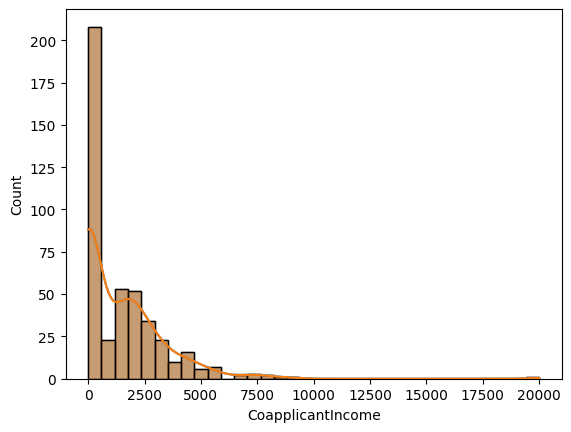

In [54]:
##histogramas

sns.histplot(X_train.CoapplicantIncome,kde=True)##histogramas

sns.histplot(X_train.CoapplicantIncome,kde=True)

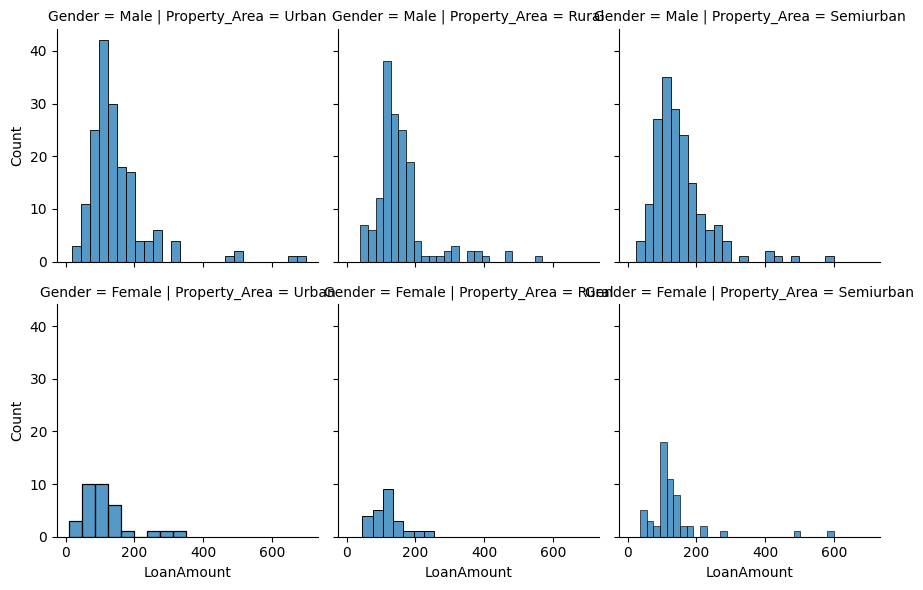

In [55]:
# como se distribuye el prestamos dependiendo las caracteristicas de lossolicutantes
g=sns.FacetGrid(df, col="Property_Area", row="Gender")
g.map(sns.histplot,"LoanAmount")
plt.show()

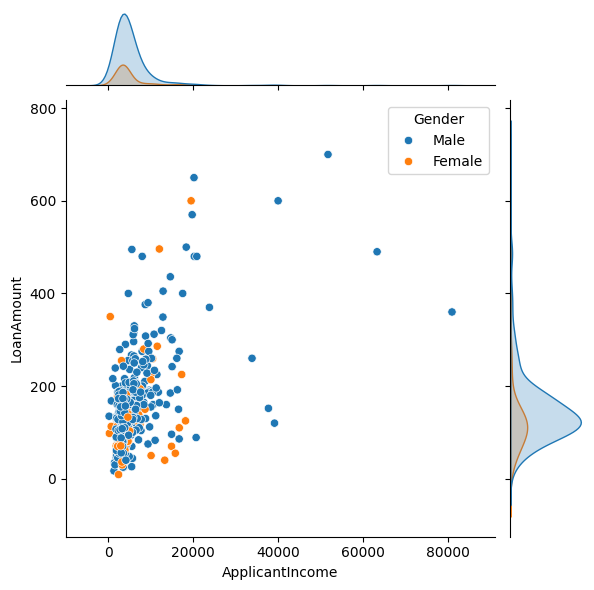

In [56]:
#correlacion enterminos de hombres y mujeres
sns.jointplot(data=df, x="ApplicantIncome", y="LoanAmount" , hue='Gender', color='b')
plt.show()

el gráfico de dispersión muestra cómo se distribuyen los puntos para "ApplicantIncome" versus "LoanAmount", y colorea los puntos según el género. Además, incluye líneas de regresión y distribuciones marginales para cada variable por separado. Este tipo de visualización es útil para explorar la relación entre dos variables y cómo esta relación puede variar según una tercera variable categórica, en este caso, el género.








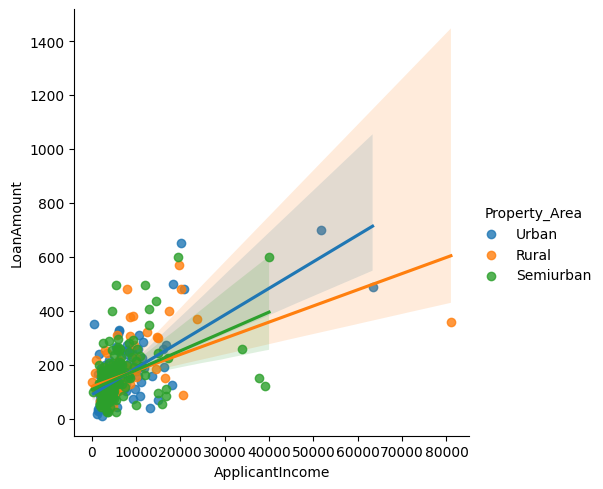

In [57]:
sns.lmplot(x="ApplicantIncome", y="LoanAmount",hue='Property_Area',data=df)
plt.show()

este gráfico de dispersión con línea de regresión muestra la relación entre los ingresos de los solicitantes y el monto del préstamo, y colorea los puntos según la ubicación de la propiedad ("Property_Area"). Esto puede ayudar a visualizar cómo se distribuyen los puntos en función del área de propiedad y si hay alguna tendencia o patrón discernible en la relación entre las variables.

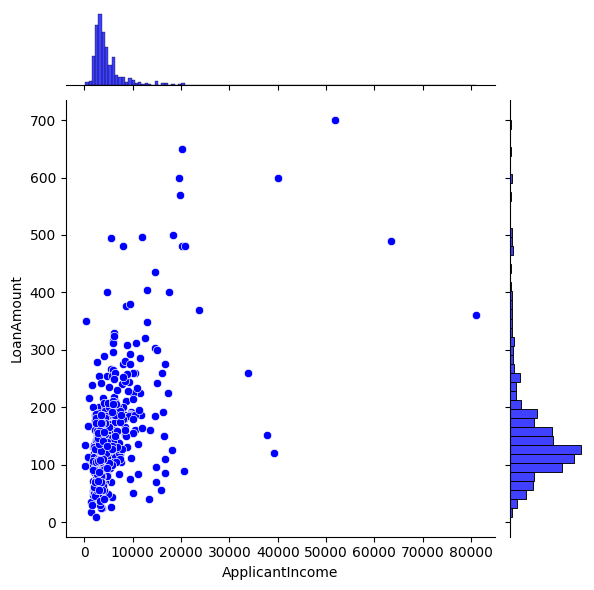

In [58]:
sns.jointplot(data=df, x="ApplicantIncome", y="LoanAmount" , kind='scatter', color='b')
plt.show()

 este gráfico de dispersión muestra cómo se distribuyen los puntos para "ApplicantIncome" versus "LoanAmount". Las distribuciones marginales en los ejes x e y proporcionan información adicional sobre la distribución univariante de cada variable. Este tipo de visualización es útil para explorar la relación entre dos variables y para examinar la distribución de cada variable por separado.

<Axes: >

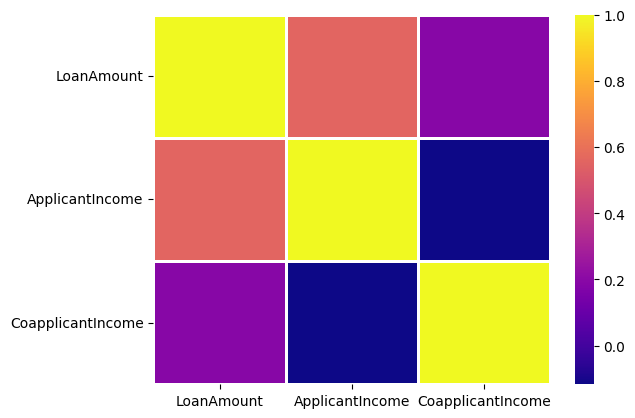

In [59]:
#correlacion de atributos
corr_mat=np.corrcoef(df_test,rowvar=False)
corr_mat.shape
df_test.head()
corr_df=pd.DataFrame(corr_mat,columns=df_test.columns,index=df_test.columns)
sns.heatmap(corr_df,linewidths=1,cmap='plasma', fmt=".2f")

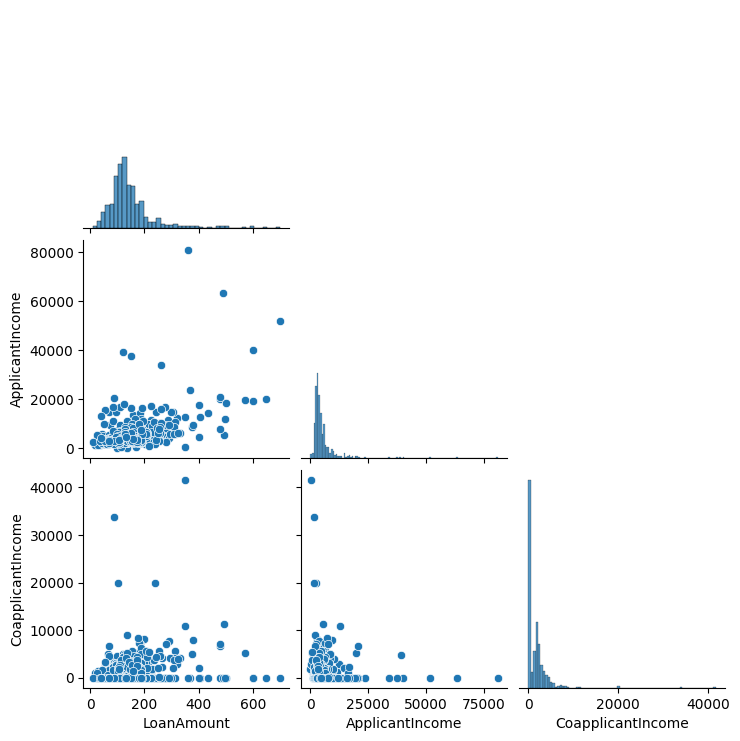

In [60]:
#distribucion que idinca como estan relaiconadas cada una dfe las variables
sns.pairplot(data=df_test,corner=True)

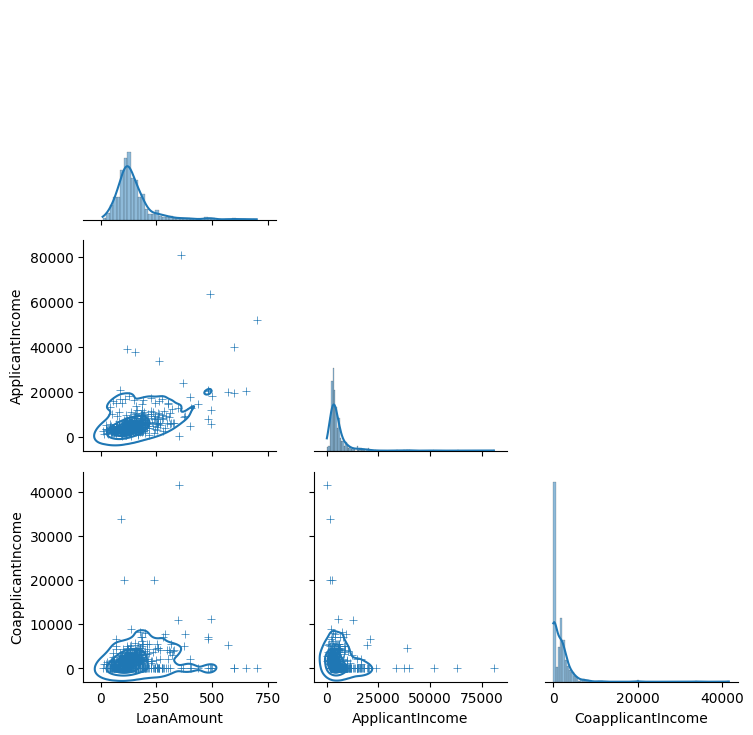

In [61]:
# otra forma de verlo
g= sns.PairGrid(df_test, corner=True)
g.map_lower(sns.kdeplot,hue=None, levels=5)
g.map_lower(sns.scatterplot,marker="+")
g.map_diag(sns.histplot, linewidth=0.1,kde=True)

este conjunto de gráficos en forma de matriz proporciona una visualización completa de las relaciones entre las variables en el DataFrame df_test, incluyendo gráficos de densidad en la diagonal inferior, gráficos de dispersión en la diagonal inferior y histogramas en la diagonal principal. Esto facilita la exploración visual de las relaciones y distribuciones en el conjunto de datos.